# Pre-processing the fits files
Date: 16 Nov 2022

In [1]:
#Libraries
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import astropy
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
import glob
import imageio
import time
import os
from PIL import Image, ImageChops

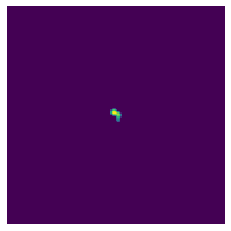

In [2]:
#Saving fits as image
path = (r"C:\Users\neham\Downloads\Year 4\ProjectCodingFiles\FIRSTDownloads\WATsdownloads")
for i in listdir(path):
    #print(i)
    image_file = get_pkg_data_filename(path+r"\{}".format(i))
    image_data = fits.getdata(image_file, ext=0)
    thresh = 10**-3.1
    log_image_data = np.copy(image_data)
    # Removes values below a threshold, deals with negative flux, so can plot log colour scale
    log_image_data[log_image_data<thresh] = thresh
    plt.imshow(log_image_data, cmap='viridis', origin='lower', norm=colors.LogNorm())
    plt.axis("off")

    plt.savefig(r"C:\Users\neham\Downloads\Year 4\ProjectCodingFiles\FIRSTDownloads\WATsImages\{}.jpg".format(i[:-5]))

1.jpg
432 288
260 260
10.jpg
432 288
260 260
11.jpg
432 288
260 260
12.jpg
432 288
260 260
13.jpg
432 288
260 260
14.jpg
432 288
260 260
15a.jpg
432 288
260 260
16a,d.jpg
432 288
260 260
17.jpg
432 288
260 260
18d.jpg
432 288
260 260
19.jpg
432 288
260 260
2.jpg
432 288
260 260
20.jpg
432 288
260 260
21.jpg
432 288
260 260
22.jpg
432 288
260 260
23.jpg
432 288
260 260
24c.jpg
432 288
260 260
25a.jpg
432 288
260 260
26.jpg
432 288
260 260
27.jpg
432 288
260 260
28.jpg
432 288
260 260
29.jpg
432 288
260 260
30a.jpg
432 288
260 260
31.jpg
432 288
260 260
32.jpg
432 288
260 260
33.jpg
432 288
260 260
34.jpg
432 288
260 260
35.jpg
432 288
260 260
36.jpg
432 288
260 260
37.jpg
432 288
260 260
38.jpg
432 288
260 260
39.jpg
432 288
260 260
3a.jpg
432 288
260 260
4.jpg
432 288
260 260
40.jpg
432 288
260 260
41.jpg
432 288
260 260
42.jpg
432 288
260 260
43.jpg
432 288
260 260
44a.jpg
432 288
260 260
45.jpg
432 288
260 260
46a.jpg
432 288
260 260
47.jpg
432 288
260 260
48.jpg
432 288
260 260
49.j

J133605+004726.jpg
432 288
260 260
J133732-080336.jpg
432 288
260 260
J133902-072643.jpg
432 288
260 260
J134048+543949.jpg
432 288
260 260
J134121-011614.jpg
432 288
260 260
J134503+611031.jpg
432 288
260 260
J134504+085507.jpg
432 288
260 260
J134522-045149.jpg
432 288
260 260
J134546+533248.jpg
432 288
260 260
J134554+365503.jpg
432 288
260 260
J135120-054850.jpg
432 288
260 260
J135144+071217.jpg
432 288
260 260
J135330-073216.jpg
432 288
260 260
J135442+052856.jpg
432 288
260 260
J135547+175845.jpg
432 288
260 260
J135905+280809.jpg
432 288
260 260
J140108+325600.jpg
432 288
260 260
J140109+565420.jpg
432 288
260 260
J140123+074040.jpg
432 288
260 260
J140148+283317.jpg
432 288
260 260
J140605+021153.jpg
432 288
260 260
J140806+454054.jpg
432 288
260 260
J140853+051124.jpg
432 288
260 260
J141054+584655.jpg
432 288
260 260
J141055-063639.jpg
432 288
260 260
J141110+453518.jpg
432 288
260 260
J141129+104859.jpg
432 288
260 260
J141138-073143.jpg
432 288
260 260
J141209+025751.jpg
4

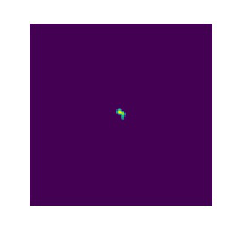

In [3]:
# round 1 cropping

path = (r"C:\Users\neham\Downloads\Year 4\ProjectCodingFiles\FIRSTDownloads\WATsImages")

for i in listdir(path):
    print(i)
    im = Image.open(r"C:\Users\neham\Downloads\Year 4\ProjectCodingFiles\FIRSTDownloads\WATsImages\{}".format(i))
    width, height = im.size   # Get dimensions
    print(width,height)
    new_width = width*0.6
    new_height = height*0.9
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    plt.axis("off")

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    rgb_im = im.convert('RGB')
    plt.imshow(im)
    width, height = im.size   # Get dimensions
    print(width,height)
    rgb_im.save(r"C:\Users\neham\Downloads\Year 4\ProjectCodingFiles\Sem1_GAN\kerasGAN\WATsImages\{}.jpg".format(i[:-4]))

In [4]:
#removing massive white border

path = (r"C:\Users\neham\Downloads\Year 4\ProjectCodingFiles\Sem1_GAN\kerasGAN\WATsImages")

for j in listdir(path):
    #print(j)
    j=str(j)
    image= cv2.imread(path+(r"\{}").format(j))
    original_image = image
    gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edges= cv2.Canny(gray, 50,200)
    contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)
    for (i,c) in enumerate(sorted_contours):
        x,y,w,h= cv2.boundingRect(c)
        cropped_contour= original_image[y:y+h, x:x+w]
        image_name= str(j)
        cv2.imwrite((r"C:\Users\neham\Downloads\Year 4\ProjectCodingFiles\Sem1_GAN\kerasGAN\CroppedWATsImages\{}").format(image_name), cropped_contour)
        #readimage= cv2.imread(image_name)
        #cv2.imshow('Image', readimage)
        #cv2.waitKey(0)
    #cv2.destroyAllWindows()

In [5]:
#Removing all thin white borders and replaces the previous images

def trim(im):
        bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
        diff = ImageChops.difference(im, bg)
        diff = ImageChops.add(diff, diff, 2.0, -100)
        bbox = diff.getbbox()
        if bbox:
                return im.crop(bbox)
path = (r"C:\Users\neham\Downloads\Year 4\ProjectCodingFiles\Sem1_GAN\kerasGAN\CroppedWATsImages")
        
for filename in os.listdir(path):
        filePath = os.path.join(path, filename)
        im = Image.open(filePath)
        im = trim(im)
        newFilePath = os.path.join(path, filename)
        im.save(newFilePath)